In [1]:
%matplotlib widget
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
x0 = 1
y0 = 1
z0 = 1
position_offset = [x0, y0, z0]


In [3]:
def degrees_to_radians(degrees):
    return degrees * (np.pi / 180)

In [4]:
def keplar_to_cartesian(eccentricity, semi_major_axis, semi_minor_axis, inclination, argument_of_periapsis, long_asc_node, true_anomaly, grav_const, figure_name):
    # Graphing section
    fig = plt.figure(figsize = (7,7))

    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1,1,1])

    ax.set_xlabel('X')

    ax.set_ylabel('Y')

    ax.set_zlabel('Z')
    t = np.linspace(0, 2*np.pi, 200)

    x0 = 1
    y0 = 1
    z0 = 1
    position_offset = [x0, y0, z0]

    starting_point_x = semi_major_axis * np.cos(true_anomaly)
    starting_point_y = semi_minor_axis * np.sin(true_anomaly)
    starting_point_z = 0

    starting_vector = np.array([starting_point_x, starting_point_y, starting_point_z])
    
    x_ellipse_mag = np.cos(t)

    y_ellipse = np.sin(t)

    z_ellipse = t * 0

    base_ellipse = np.array([x_ellipse_mag * semi_major_axis, y_ellipse * semi_minor_axis, z_ellipse])

    # Z axis rotation (Longitude of ascending node)
    Rotation_Matrix_1 = np.identity(3)
    Rotation_Matrix_1[0][0] = np.cos(argument_of_periapsis)
    Rotation_Matrix_1[0][1] = - np.sin(argument_of_periapsis)
    Rotation_Matrix_1[1][0] = np.sin(argument_of_periapsis)
    Rotation_Matrix_1[1][1] = np.cos(argument_of_periapsis)

    #Rotation_Matrix_1 = np.matmul(Rotation_Matrix_1, Scaling_Factor)

    # X axis rotation (inclination)
    Rotation_Matrix_2_Cardinal = np.identity(3)

    Rotation_Matrix_2_Cardinal[1][1] = np.cos(inclination)
    Rotation_Matrix_2_Cardinal[1][2] = - np.sin(inclination)
    Rotation_Matrix_2_Cardinal[2][1] = np.sin(inclination)
    Rotation_Matrix_2_Cardinal[2][2] = np.cos(inclination)

    Rotation_Matrix_2_Scaled = np.matmul(Rotation_Matrix_1, Rotation_Matrix_2_Cardinal)

    # Y axis rotation (Argument of periapsis) (Cardinal)

    Rotation_Matrix_3 = np.identity(3)

    Rotation_Matrix_3[0][0] = np.cos(long_asc_node)
    Rotation_Matrix_3[0][2] = np.sin(long_asc_node)
    Rotation_Matrix_3[2][0] = - np.sin(long_asc_node)
    Rotation_Matrix_3[2][2] = np.cos(long_asc_node)

    # Scale the rotation by the total matrix

    Full_Rotation_Matrix = np.matmul((np.matmul(Rotation_Matrix_1, Rotation_Matrix_2_Scaled)), Rotation_Matrix_3)

    ellipse = np.matmul(Full_Rotation_Matrix, base_ellipse)


    # Offset from origin
    x_points = ellipse[0] + x0
    y_points = ellipse[1] + y0
    z_points = ellipse[2] + z0

    # Plot ellipse
    points = np.array([x_points, y_points, z_points])
    plt.plot(points[0], points[1], points[2], color="purple", label = "post-transformation ellipse")

    # Centre point
    x_centre = x0
    y_centre = y0
    z_centre = z0

    ax.scatter(x_centre, y_centre, z_centre)

    # Reference point
    ref_matrix = np.array([semi_major_axis,0,0])

    ref_matrix  = np.matmul(Full_Rotation_Matrix, ref_matrix)

    ax.scatter(ref_matrix[0] + x0, ref_matrix[1] + y0, ref_matrix[2] + z0, color="g", marker="v", label = "Reference Direction post-transformation")


    # Base ellipse for comparison
    ax.scatter(semi_major_axis + x0, y0, z0, marker="v", alpha=0.6, label = "Reference Direction pre-transformation")
    plt.plot(base_ellipse[0] + x0, base_ellipse[1] + y0, base_ellipse[2] + z0, "b", alpha=0.3, label = "pre-transformation ellipse")

    # Important point
    final_vector = np.matmul(Full_Rotation_Matrix, starting_vector) + position_offset
    ax.scatter(final_vector[0], final_vector[1], final_vector[2], color="red", marker="o", label = "Satellite")



    # Line to true anomaly from centre
    line_diff = [[x0, final_vector[0]], [y0, final_vector[1]], [z0, final_vector[2]]]
    plt.plot(line_diff[0], line_diff[1], line_diff[2], '--', color="red", alpha=0.5)

    # Line to reference direction from centre
    line_diff_2 = [[x0, ref_matrix[0] + x0], [y0, ref_matrix[1] + y0], [z0, ref_matrix[2] + z0]]
    plt.plot(line_diff_2[0], line_diff_2[1], line_diff_2[2], '--',color="green", alpha=0.5)

    # Line to base ellipse point from centre
    line_diff_3 = [[x0, semi_major_axis + x0], [y0, y0], [z0, z0]]
    plt.plot(line_diff_3[0], line_diff_3[1], line_diff_3[2], '--',color="blue", alpha=0.5)

    plt.legend()
    plt.title(figure_name)
    graph_scale = 5000000
    ax.set_xlim3d(-graph_scale, graph_scale)
    ax.set_ylim3d(-graph_scale, graph_scale)
    ax.set_zlim3d(-graph_scale, graph_scale)


    radius_vector = [final_vector[0] - x0, final_vector[1] - y0, final_vector[2] - z0]
    radius = np.linalg.norm(radius_vector)

    velocity_mag_simplified = np.sqrt((grav_const) / radius)

    Vx_Simplified = velocity_mag_simplified * np.cos(argument_of_periapsis)
    Vy_Simplified = velocity_mag_simplified * np.sin(argument_of_periapsis)

    V_Vector_Simplified = np.array([Vx_Simplified, Vy_Simplified, 0])
    V_Vector = np.matmul(Full_Rotation_Matrix, V_Vector_Simplified)
    return(radius_vector, V_Vector)

        
    
    

[-2635197.8777090437, 2995484.3695141464, 5492406.218251016] [4616.81444927 6110.51633369 -243.59605556]
[5512593.6678891955, -224599.90988220906, -3955324.7995583415] [ 5487.45876805  1369.79520078 -5169.54320659]


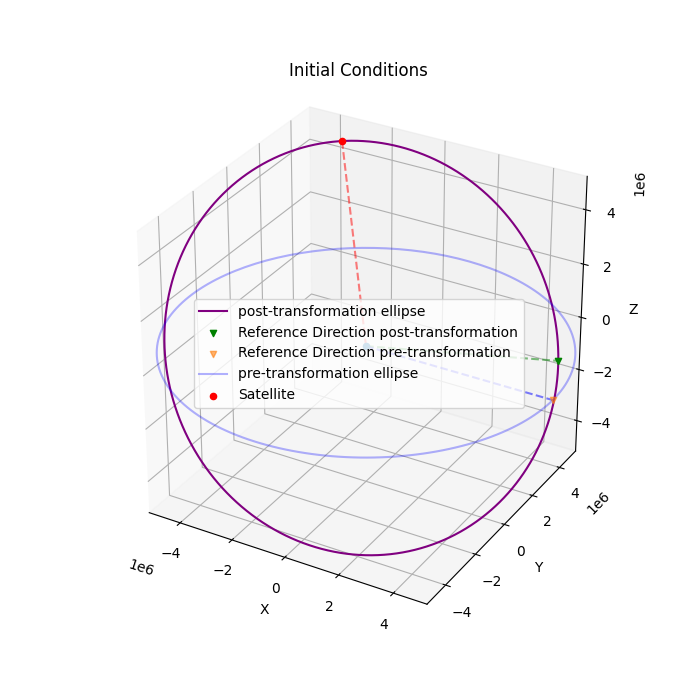

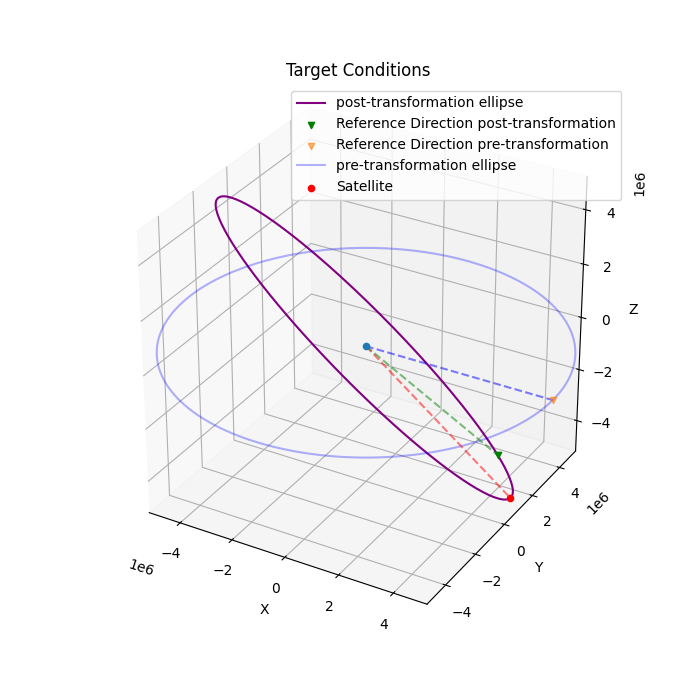

In [5]:
# Satellite keplar conditions to convert

max_alt = 418000 + 6371 * 1000
min_alt = 417000 + 6371 * 1000

grav_const = 6.674e-11 * 5.972e24



def input_variables_degrees_to_radians(eccentricity, semi_major_axis, inclination, argument_of_periapsis, long_asc_node, true_anomaly, grav_const, figure_name):
    inclination = degrees_to_radians(inclination)
    argument_of_periapsis = degrees_to_radians(argument_of_periapsis)
    long_asc_node = degrees_to_radians(long_asc_node)
    true_anomaly = degrees_to_radians(true_anomaly)
    semi_minor_axis = semi_major_axis * np.sqrt(1 - eccentricity ** 2)
    
    y, dy = keplar_to_cartesian(eccentricity, semi_major_axis, semi_minor_axis, inclination, argument_of_periapsis, long_asc_node, true_anomaly, grav_const, figure_name)
    return(y,dy)



y_start, dy_start = input_variables_degrees_to_radians(0.00051, (max_alt + min_alt) / 2, 51.6434, 13.8511, 21.3671, 98.5566, grav_const, "Initial Conditions")
print(y_start, dy_start)
y_finish, dy_finish = input_variables_degrees_to_radians(0.0004806, (max_alt + min_alt) / 2, 180, 22.9581, 312.8869, 37.3247, grav_const, "Target Conditions")
print(y_finish, dy_finish)

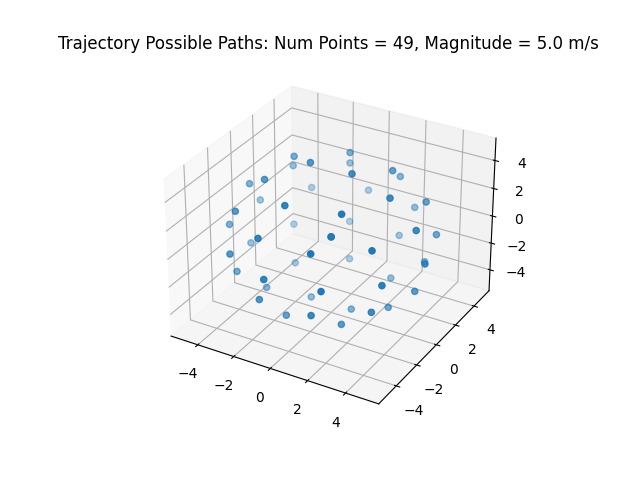

In [6]:
N_count = 0


def create_possible_paths(magnitude, n_points):
    s_r = magnitude # Magnitude of thrust
    N_count = 0
    
    sphere_points = np.zeros((int(np.ceil(n_points)) + 2,3))
    
    sphere_area = (4 * np.pi) / n_points
    d = np.sqrt(sphere_area)    

    M_theta = int(np.ceil(np.pi/d))
    d_theta = np.pi/M_theta
    d_phi = sphere_area / d_theta
    for m in range(0, M_theta):
        theta = (np.pi * (m + 0.5)) / M_theta
        M_phi = round((2 * np.pi * np.sin(theta)) / d_phi)
        for n in range (0, M_phi):
            phi = (2 * np.pi * n) / M_phi
            sphere_points[N_count] = spherical_points_to_cartesian(s_r, theta, phi)
            N_count += 1
    plot_point_num(sphere_points, N_count)
    return(sphere_points)


def spherical_points_to_cartesian(r, theta, phi):
    """Converts spherical coordinates into cartesian ones"""
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    returned_vector = r * np.array([x,y,z])
    
    return returned_vector

def plot_point_num(points, N_count):
    fig = plt.figure()
    ax_p = fig.add_subplot(projection='3d')
    ax_p.scatter(points[:,0], points[:,1], points[:,2])
    ax_p.set_title(f"Trajectory Possible Paths: Num Points = {N_count}, Magnitude = {np.linalg.norm(points[0])} m/s")



path_starts = create_possible_paths(5, 50)

6.67e-11


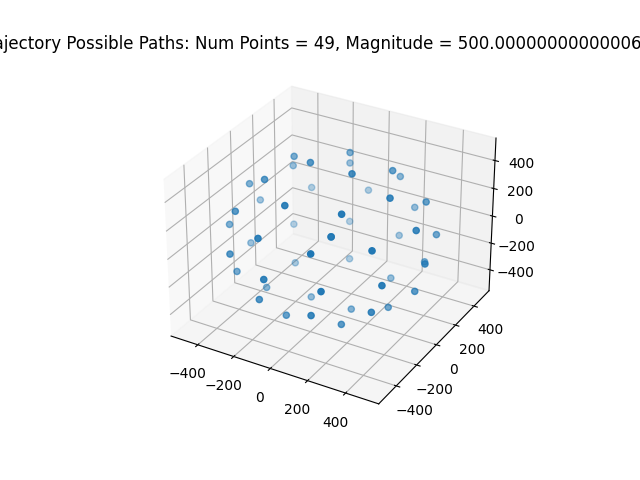

In [7]:
import numpy as np

grav_const = 6.67e-11
print(grav_const)

class Body():
    def __init__(self, name, y, mass):
        self.name = name
        self.y = y
        self.mass = mass
        
class Simulation(Body):
    def __init__(self, max_steps, dt, max_sims, bodies):
        self.bodies = bodies
        self.max_steps = max_steps
        self.dt = dt
        self.max_sims = max_sims

    def run_sim(self, satellite):
        paths = np.zeros((self.max_sims, 3, int(self.max_steps / self.dt)))
        #print(len(paths[0][0]))
        path_alterations = create_possible_paths(500, self.max_sims)
        for p in range(len(paths)):
            altered_y_i = satellite.y
            altered_y_i[3:] += path_alterations[p]
            t_list, y = RK4(self, altered_y_i, grav_function, self.max_steps, self.dt)
            paths[p] = y[:3]
            
        return paths, y[:][3:].T

def grav_function(sim, y):
    """Calculates the acceleration experienced by the object"""
    
    y_new = np.zeros(6)
    for body in sim.bodies:
        sep = body.y[:3] - y[:3]
        sep_mag = np.linalg.norm(sep)

        #print(sep_mag)
        accel = ((grav_const * body.mass) / (sep_mag ** 3)) * sep
        
        #print(np.linalg.norm(accel))
        #if np.linalg.norm(accel) > 100000:
        #    print(accel, sep, body.mass)
        #print(y)
        y_new[3:] += accel * sim.dt
        #print(y_new)
        y_new[:3] += (y[3:] + y_new[3:]) * sim.dt
        #print(y_new)
    return y_new
        
        
                    
def RK4(sim, y_initial, f, t, dt):
    """Implementation of a 4th-order Runge Kutta method."""  
    m = y_initial.shape[0]
    max_steps = int(t/dt)
    tlist = np.linspace(0, t, max_steps)
    y = np.zeros((m, max_steps), float)
    y[:, 0] = y_initial
    #y[:, 0] = Sim1.sat_y
    for i in range(0,max_steps-1):
        k1 = f(sim, y[:, i])
        #print(k1)
        k2 = f(sim, y[:, i] + (0.5 * dt * k1))
        #print(k2)
        k3 = f(sim, y[:, i] + 0.5 * dt * k2)
        k4 = f(sim, y[:, i] + dt * k3)
        y[:, i + 1] = y[:, i] + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return(tlist, y)

#Sat = Body("Satellite", np.array([22314050.238, -6.50E+04, -1.70E+04, -933.974765, -5000.940683, 498.5964516]), 2)
Sat = Body("Satellite", np.array([y_start[0], y_start[1], y_start[2], dy_start[0], dy_start[1], dy_start[2],]), 2)
# 5.97e24

#Sat = Body("Satellite", np.array([-1.43e11, 1678245, 4.84E+10, -9083, -2.34, -28122]), 2)
Planet = Body("Planet", np.array([1,1,1,1,1,1]), 5.97e24)
#print(Sat.y)

Sim1 = Simulation(5000, 1, 50, [Planet])

#grav_function(Sim1, Sat.y)
#Simulation.run_sim(Sim1)

#print(Sim1.sat_y)
#t_list, y = RK4(Sim1, Sat.y, grav_function, 120000, 2000)


paths, velocities = Simulation.run_sim(Sim1, Sat)

In [8]:
#Determining the best orbital path

final_distances = []
maximum_allowed_distance = 1000000000
current_min_distance = maximum_allowed_distance
current_best_path = 0


for path in range(len(paths)):
    final_x = y_finish[0] - paths[path][0][-1]
    final_y = y_finish[1] - paths[path][1][-1]
    final_z = y_finish[2] - paths[path][2][-1]
    final_radius = np.sqrt(final_x ** 2 + final_y ** 2 + final_z ** 2)
    final_distances.append(final_radius)
    #print(final_radius)
    
for path in range(len(final_distances)):
    if final_distances[path] < current_min_distance:
        current_min_distance = final_distances[path]
        current_best_path = path
        
#print(current_best_path, final_distances[current_best_path])
print(current_best_path)
np.delete(paths, current_best_path)
best_path = paths[current_best_path]

print("Final stats:\n")
print(f"The closest path was path alteration {current_best_path}, at a proximity of {final_distances[current_best_path]:.2f} metres.")
print(f"Your maximum allowed distance was {maximum_allowed_distance} metres, and your final distance is {(final_distances[current_best_path] / maximum_allowed_distance) * 100:.2f} % of that.\n")
final_x = y_finish[0] - paths[path][0][-1]
final_y = y_finish[1] - paths[path][1][-1]
final_z = y_finish[2] - paths[path][2][-1]
print("The initial starting velocity vector was:")
print(velocities[current_best_path])
print("\n")
print("While the initial starting velocity was:")
print(dy_start)
print("\n")
print("This corresponds to a velocity change of:")
print(velocities[current_best_path] - dy_start)
print("\n")
print(f"This change has a total magnitude of {np.linalg.norm(velocities[current_best_path] - dy_start)} m/s.")


7
Final stats:

The closest path was path alteration 7, at a proximity of 2690233.64 metres.
Your maximum allowed distance was 1000000000 metres, and your final distance is 0.27 % of that.

The initial starting velocity vector was:
[4640.12458817 6083.6655285  -292.47220154]


While the initial starting velocity was:
[4616.81444927 6110.51633369 -243.59605556]


This corresponds to a velocity change of:
[ 23.3101389  -26.85080519 -48.87614599]


This change has a total magnitude of 60.44175677092717 m/s.


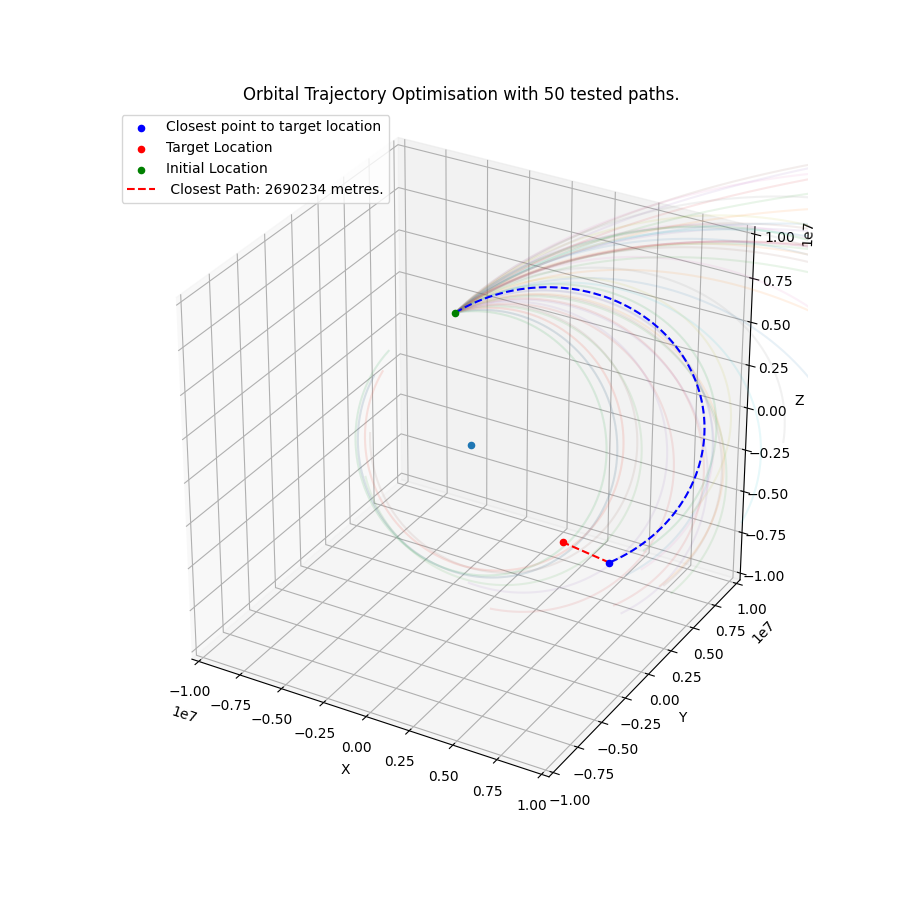

In [9]:
import matplotlib.pyplot as plt
%matplotlib widget
# Graphing section
fig = plt.figure(figsize = (9,9))

ax2 = fig.add_subplot(111, projection='3d')
ax2.set_box_aspect([1,1,1])

graphcounter = 0


show_paths = True
if show_paths == True:
    for path in paths:
        ax2.plot3D(path[0], path[1], path[2], alpha=0.1)
        
ax2.plot3D(best_path[0], best_path[1], best_path[2], '--', color="b")


# Plotting key points on graph
ax2.scatter3D(best_path[0][-1], best_path[1][-1], best_path[2][-1], 'o', color="b", label=f"Closest point to target location")
ax2.scatter3D(y_finish[0], y_finish[1], y_finish[2], 'o', color="r", label="Target Location")
ax2.scatter3D(y_start[0], y_start[1], y_start[2], 'o', color="g", label="Initial Location")

closest_line = [[best_path[0][-1], y_finish[0]], [best_path[1][-1], y_finish[1]], [best_path[2][-1], y_finish[2]]]

ax2.plot3D(closest_line[0], closest_line[1], closest_line[2], '--', color="r", label=f" Closest Path: {final_distances[current_best_path]:.0f} metres.")
leg = plt.legend(loc='upper left')

    
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

ax2.set_xlabel('X')

ax2.set_ylabel('Y')

ax2.set_zlabel('Z')



x = 6371000 * np.outer(np.cos(u), np.sin(v))
y = 6371000 * np.outer(np.sin(u), np.sin(v))
z = 6371000 * np.outer(np.ones(np.size(u)), np.cos(v))

#ax.plot_surface(x, y, z, rstride=2, cstride=2, color='b')
ax2.scatter(0,0,0)
# The area that the graph will show upon start
GraphAreaStart = 10000000

ax2.set_xlim3d(-1 * GraphAreaStart, GraphAreaStart)
ax2.set_ylim3d(-1 * GraphAreaStart, GraphAreaStart)
ax2.set_zlim3d(-1 * GraphAreaStart, GraphAreaStart)
plt.legend()
plt.title(f"Orbital Trajectory Optimisation with {len(paths)} tested paths.")
plt.show()